In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Make plots look nicer
plt.style.use("seaborn-v0_8")


In [77]:
# Load dataset (make sure the CSV file is in the same folder as the notebook)
df = pd.read_csv("2021-2022 Football Team Stats.csv", encoding="latin1", delimiter=";")

# Display first 5 rows
df.head()
df.shape

(98, 20)

In [79]:
# Display dataset info and column names
print(df.info())
print("\nColumns:", df.columns.tolist())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Rk               98 non-null     int64  
 1   Squad            98 non-null     object 
 2   Country          98 non-null     object 
 3   LgRk             98 non-null     int64  
 4   MP               98 non-null     int64  
 5   W                98 non-null     int64  
 6   D                98 non-null     int64  
 7   L                98 non-null     int64  
 8   GF               98 non-null     int64  
 9   GA               98 non-null     int64  
 10  GD               98 non-null     int64  
 11  Pts              98 non-null     int64  
 12  Pts/G            98 non-null     float64
 13  xG               98 non-null     float64
 14  xGA              98 non-null     float64
 15  xGD              98 non-null     float64
 16  xGD/90           98 non-null     float64
 17  Attendance       9

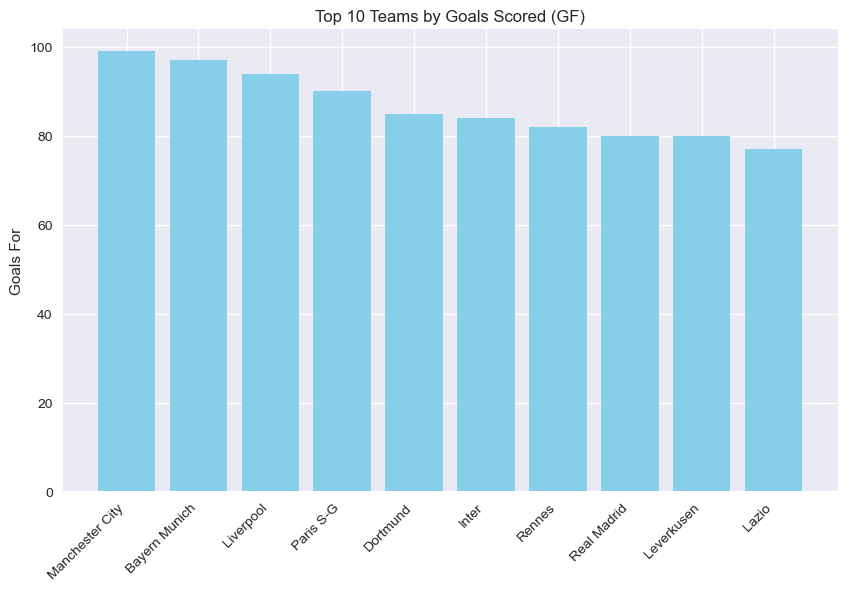

In [81]:
# Top 10 teams by Goals For (GF)
top_gf = df.nlargest(10, "GF")

plt.figure(figsize=(10,6))
plt.bar(top_gf["Squad"], top_gf["GF"], color="skyblue")
plt.xticks(rotation=45, ha="right")
plt.title("Top 10 Teams by Goals Scored (GF)")
plt.ylabel("Goals For")
plt.show()

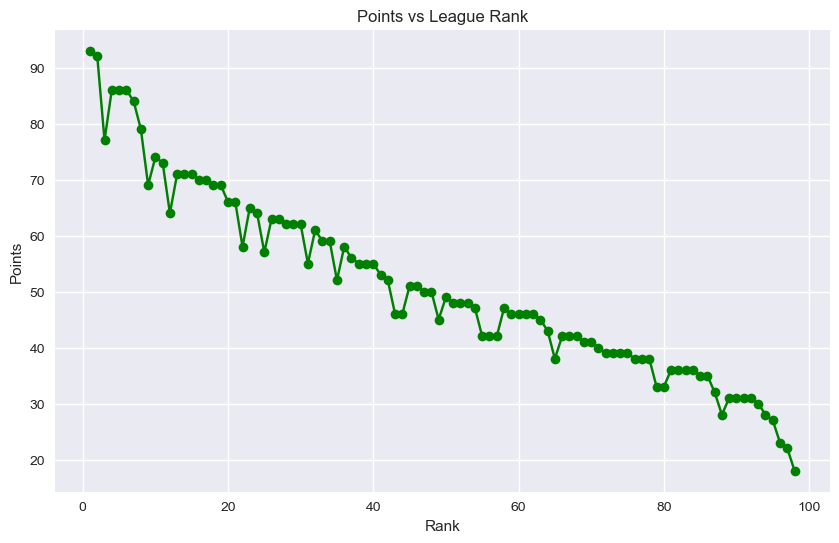

In [82]:
# Points vs Rank
plt.figure(figsize=(10,6))
plt.plot(df["Rk"], df["Pts"], marker="o", color="green")
plt.title("Points vs League Rank")
plt.xlabel("Rank")
plt.ylabel("Points")
plt.show()

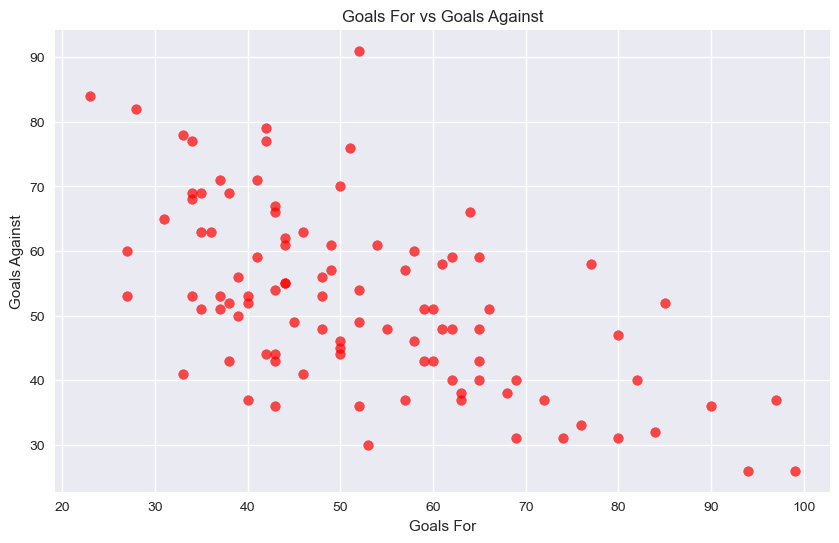

In [84]:
# Goals For vs Goals Against
plt.figure(figsize=(10,6))
plt.scatter(df["GF"], df["GA"], alpha=0.7, c="red")
plt.title("Goals For vs Goals Against")
plt.xlabel("Goals For")
plt.ylabel("Goals Against")
plt.show()

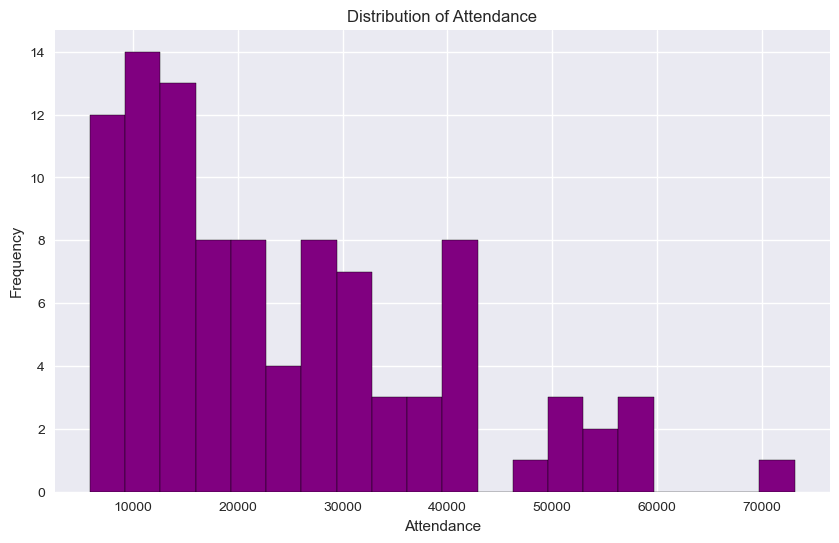

In [85]:
# Attendance Distribution
plt.figure(figsize=(10,6))
plt.hist(df["Attendance"].dropna(), bins=20, color="purple", edgecolor="black")
plt.title("Distribution of Attendance")
plt.xlabel("Attendance")
plt.ylabel("Frequency")
plt.show()

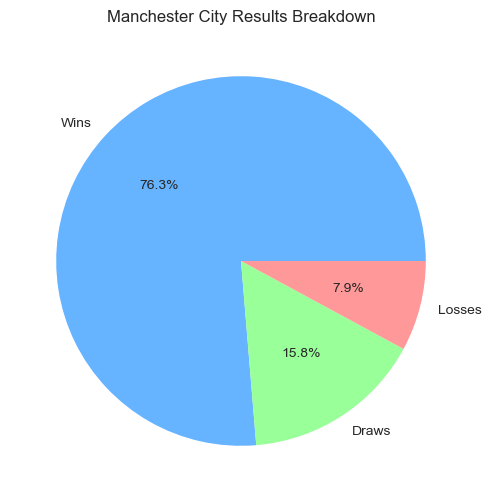

In [88]:
# Wins/Draws/Losses for Manchester City
team = df[df["Squad"] == "Manchester City"].iloc[0]

plt.figure(figsize=(6,6))
plt.pie([team["W"], team["D"], team["L"]],
        labels=["Wins", "Draws", "Losses"],
        autopct="%1.1f%%",
        colors=["#66b3ff", "#99ff99", "#ff9999"])
plt.title("Manchester City Results Breakdown")
plt.show()

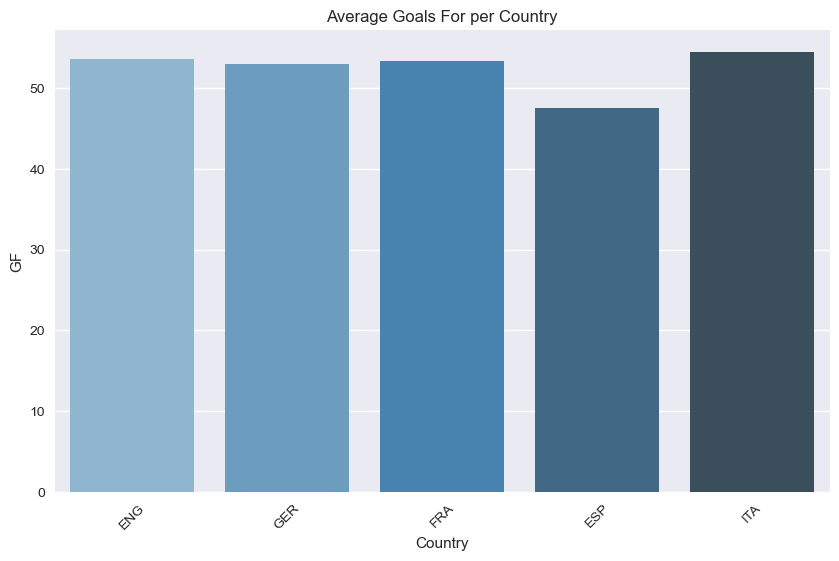

In [91]:
# Average Goals For per Country
plt.figure(figsize=(10,6))
sns.barplot(data=df, x="Country", y="GF", estimator="mean", errorbar=None, palette="Blues_d")
plt.xticks(rotation=45)
plt.title("Average Goals For per Country")
plt.show()

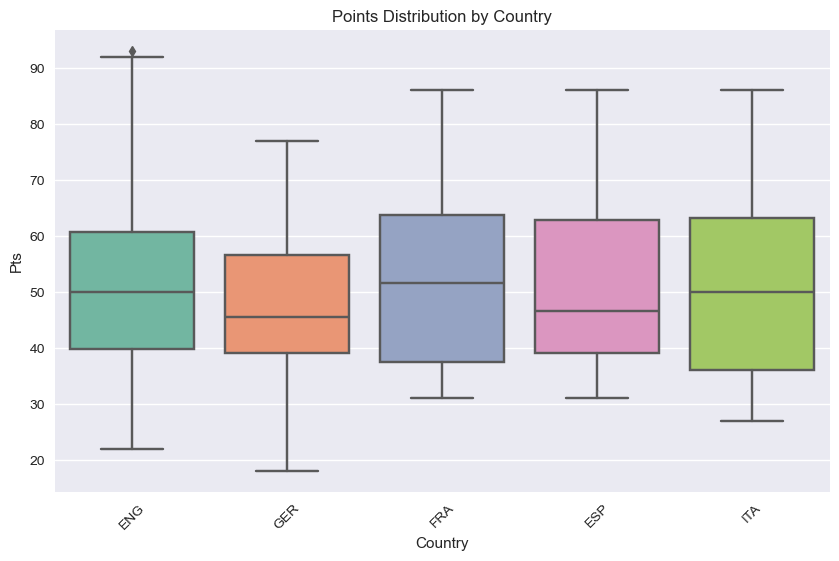

In [93]:
# Points Distribution by Country
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x="Country", y="Pts", palette="Set2")
plt.xticks(rotation=45)
plt.title("Points Distribution by Country")
plt.show()

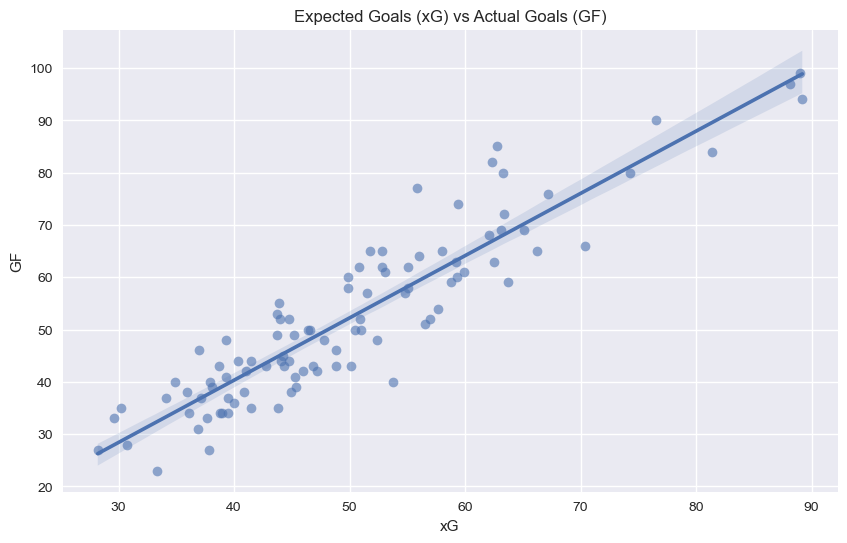

In [95]:
# xG vs Goals For
plt.figure(figsize=(10,6))
sns.regplot(data=df, x="xG", y="GF", scatter_kws={"alpha":0.6})
plt.title("Expected Goals (xG) vs Actual Goals (GF)")
plt.show()

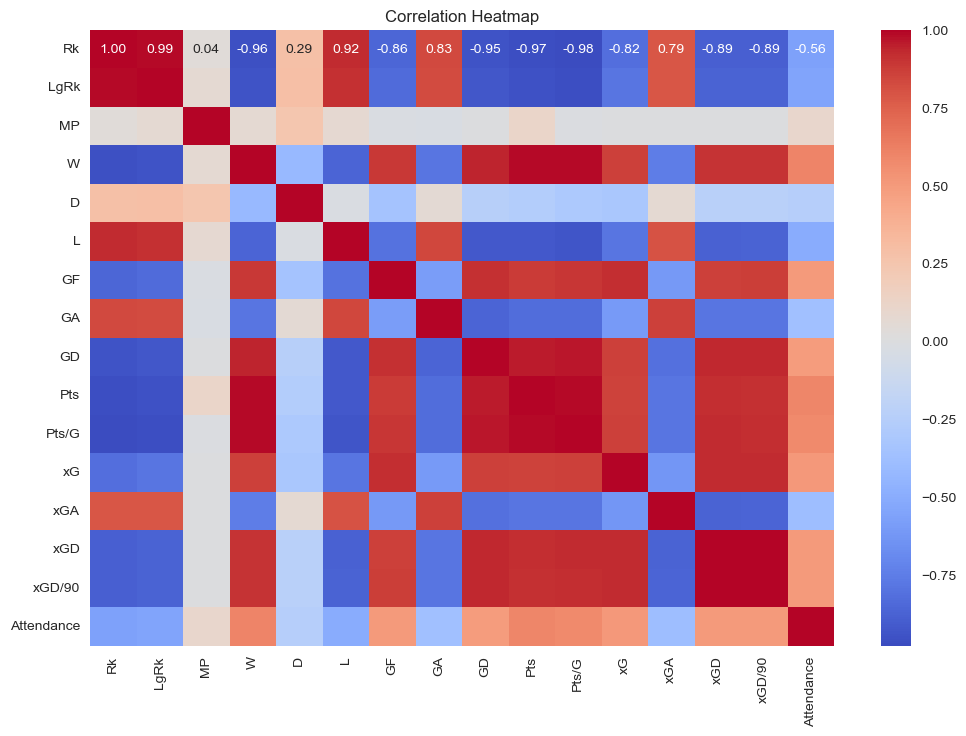

In [97]:
# Correlation Heatmap
plt.figure(figsize=(12,8))
corr = df.select_dtypes(include="number").corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

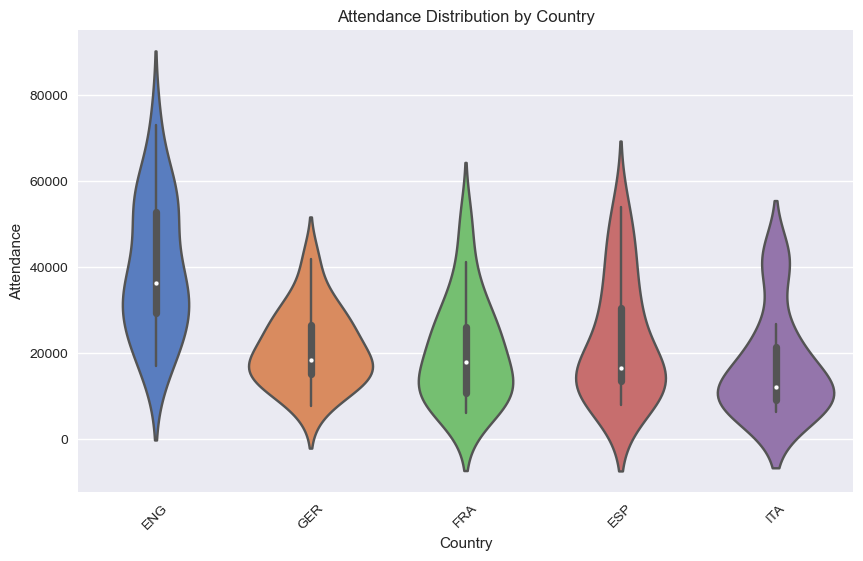

In [99]:
# Attendance Distribution by Country
plt.figure(figsize=(10,6))
sns.violinplot(data=df, x="Country", y="Attendance", palette="muted")
plt.xticks(rotation=45)
plt.title("Attendance Distribution by Country")
plt.show()

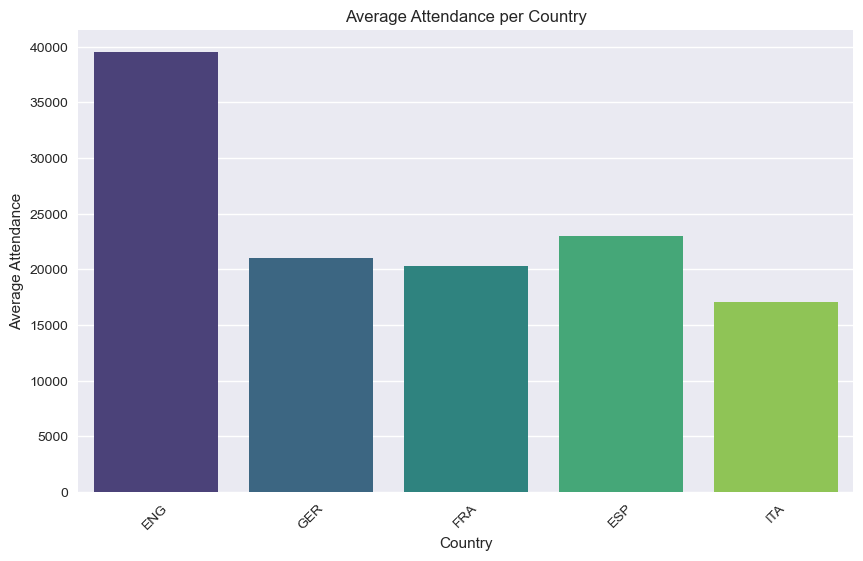

In [101]:
# Average Attendance per Country
plt.figure(figsize=(10,6))
sns.barplot(data=df, x="Country", y="Attendance", estimator="mean", errorbar=None, palette="viridis")
plt.xticks(rotation=45)
plt.title("Average Attendance per Country")
plt.ylabel("Average Attendance")
plt.show()

In [64]:
import os

# Create a folder for plots if not exists
os.makedirs("plots", exist_ok=True)

# 1. Top 10 Teams by Goals For (GF)
top_gf = df.nlargest(10, "GF")
plt.figure(figsize=(10,6))
plt.bar(top_gf["Squad"], top_gf["GF"], color="skyblue")
plt.xticks(rotation=45, ha="right")
plt.title("Top 10 Teams by Goals Scored (GF)")
plt.ylabel("Goals For")
plt.savefig("plots/top_10_goals.png", bbox_inches="tight")
plt.close()

# 2. Points vs League Rank
plt.figure(figsize=(10,6))
plt.plot(df["Rk"], df["Pts"], marker="o", color="green")
plt.title("Points vs League Rank")
plt.xlabel("Rank")
plt.ylabel("Points")
plt.savefig("plots/points_vs_rank.png", bbox_inches="tight")
plt.close()

# 3. Goals For vs Goals Against
plt.figure(figsize=(10,6))
plt.scatter(df["GF"], df["GA"], alpha=0.7, c="red")
plt.title("Goals For vs Goals Against")
plt.xlabel("Goals For")
plt.ylabel("Goals Against")
plt.savefig("plots/goals_for_vs_against.png", bbox_inches="tight")
plt.close()

# 4. Attendance Distribution
plt.figure(figsize=(10,6))
plt.hist(df["Attendance"].dropna(), bins=20, color="purple", edgecolor="black")
plt.title("Distribution of Attendance")
plt.xlabel("Attendance")
plt.ylabel("Frequency")
plt.savefig("plots/attendance_distribution.png", bbox_inches="tight")
plt.close()

# 5. Manchester City Results Breakdown
team = df[df["Squad"] == "Manchester City"].iloc[0]
plt.figure(figsize=(6,6))
plt.pie([team["W"], team["D"], team["L"]],
        labels=["Wins", "Draws", "Losses"],
        autopct="%1.1f%%",
        colors=["#66b3ff", "#99ff99", "#ff9999"])
plt.title("Manchester City Results Breakdown")
plt.savefig("plots/man_city_results.png", bbox_inches="tight")
plt.close()

# 6. Average Goals For per Country
plt.figure(figsize=(10,6))
sns.barplot(data=df, x="Country", y="GF", estimator="mean", ci=None, palette="Blues_d")
plt.xticks(rotation=45)
plt.title("Average Goals For per Country")
plt.savefig("plots/avg_goals_country.png", bbox_inches="tight")
plt.close()

# 7. Points Distribution by Country
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x="Country", y="Pts", palette="Set2")
plt.xticks(rotation=45)
plt.title("Points Distribution by Country")
plt.savefig("plots/points_distribution_country.png", bbox_inches="tight")
plt.close()

# 8. xG vs Goals For
plt.figure(figsize=(10,6))
sns.regplot(data=df, x="xG", y="GF", scatter_kws={"alpha":0.6})
plt.title("Expected Goals (xG) vs Actual Goals (GF)")
plt.savefig("plots/xg_vs_gf.png", bbox_inches="tight")
plt.close()

# 9. Correlation Heatmap
plt.figure(figsize=(12,8))
corr = df.select_dtypes(include="number").corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.savefig("plots/correlation_heatmap.png", bbox_inches="tight")
plt.close()

# 10. Average Attendance per Country
plt.figure(figsize=(10,6))
sns.barplot(data=df, x="Country", y="Attendance", estimator="mean", errorbar=None, palette="viridis")
plt.xticks(rotation=45)
plt.title("Average Attendance per Country")
plt.ylabel("Average Attendance")
plt.savefig("plots/avg_attendance_country.png", bbox_inches="tight")
plt.close()

# 11. Attendance Distribution by Country
plt.figure(figsize=(10,6))
sns.violinplot(data=df, x="Country", y="Attendance", palette="muted")
plt.xticks(rotation=45)
plt.title("Attendance Distribution by Country")
plt.savefig("plots/Violin_Attendance_distribution.png", bbox_inches="tight")
plt.show()

C:\Users\SAQLAIN\AppData\Local\Temp\ipykernel_25936\878021780.py:61: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x="Country", y="GF", estimator="mean", ci=None, palette="Blues_d")
C:\Users\SAQLAIN\AppData\Local\Temp\ipykernel_25936\878021780.py:92: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x="Country", y="Attendance", estimator="mean", ci=None, palette="viridis")
